In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import nltk
from utils import *
import re


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\helen\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [8]:
PARENT = "../TelevisionNews/"


cnn, fox, msnbc = get_data(PARENT)

[                                                   URL       MatchDateTime  \
0    https://archive.org/details/FOXNEWS_20090725_1...  7/25/2009 15:14:00   
1    https://archive.org/details/FOXNEWS_20090710_0...   7/10/2009 8:10:52   
2    https://archive.org/details/FOXNEWS_20090709_0...    7/9/2009 4:24:29   
3    https://archive.org/details/FOXNEWS_20090710_0...   7/10/2009 9:15:41   
4    https://archive.org/details/FOXNEWS_20090708_2...   7/8/2009 22:05:25   
..                                                 ...                 ...   
417  https://archive.org/details/FOXNEWS_20090724_0...   7/24/2009 3:33:24   
418  https://archive.org/details/FOXNEWS_20090724_0...   7/24/2009 9:33:24   
419  https://archive.org/details/FOXNEWS_20090724_0...   7/24/2009 0:33:29   
420  https://archive.org/details/FOXNEWS_20090717_0...   7/17/2009 0:16:25   
421  https://archive.org/details/FOXNEWS_20090712_0...   7/12/2009 6:07:12   

     Station                            Show  \
0    FOXNEWS  

           URL  Station  Show  IAShowID  IAPreviewThumb  Snippet  DateTime
DateTime                                                                  
2009-08     65       65    65        65              65       65        65
2009-09     19       19    19        19              19       19        19
2009-11    134      134   134       134             134      134       134
2009-12   1506     1506  1506      1506            1506     1506      1506
2010-01     60       60    60        60              60       60        60
...        ...      ...   ...       ...             ...      ...       ...
2019-09    701      701   701       701             701      701       701
2019-10    216      216   216       216             216      216       216
2019-11    328      328   328       328             328      328       328
2019-12    374      374   374       374             374      374       374
2020-01    260      260   254       260             260      260       260

[125 rows x 7 columns]


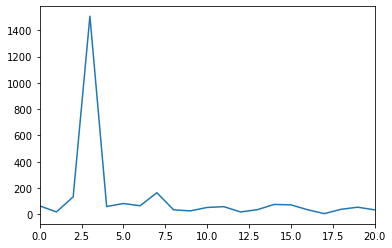

In [39]:
#print(cnn)

#groupby month
cnn_month=cnn.groupby(cnn.DateTime.dt.to_period("M")).count()


print(cnn_month)
plt.plot(cnn_month['DateTime'].values)
plt.xlim(0,20)
plt.show()



<bound method IndexOpsMixin.to_numpy of PeriodIndex(['2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016',
             '2017', '2018', '2019', '2020'],
            dtype='period[A-DEC]', name='DateTime', freq='A-DEC')>


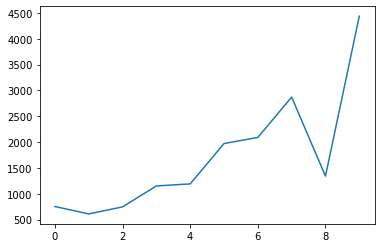

In [53]:

#groupby month
cnn_yr=cnn.groupby(cnn.DateTime.dt.to_period("Y")).count()


print(cnn_yr.index.to_numpy)
plt.plot(cnn_yr['DateTime'].values[1:-1])
plt.show()



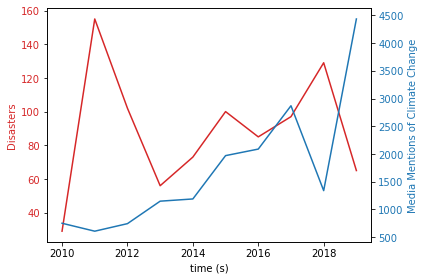

In [75]:
disasters=pd.read_csv('../state-freq-data.csv', header=1)
#print(disasters['year'])
dist_us=disasters.groupby(disasters['year']).sum()
dist_us['Total']=dist_us.drought+dist_us.freeze+dist_us['severe storm']+dist_us['tropical cyclone']+dist_us.wildfire+dist_us['winter storm']
#print(dist_us)

def plot_disasters(disttype):
    t=list(range(2010,2020))

    fig, ax1=plt.subplots()

    color = 'tab:red'
    ax1.set_xlabel('time (s)')
    ax1.set_ylabel('Disasters', color=color)
    y=dist_us[disttype].values[(2010-1980):(2019-1980+1)]
    ax1.plot(t, y, color=color)
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    color = 'tab:blue'
    ax2.set_ylabel('Media Mentions of Climate Change', color=color)  # we already handled the x-label with ax1
    ax2.plot(t, cnn_yr['DateTime'].values[1:-1], color=color)
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()

#plt.plot(dist_us.Total[2010:2019], label="Billion dollar disasters in the US")
#plt.plot(cnn_yr['DateTime'].values[1:-1], label="Frequency of Climate Change Mentions")
#plt.show()

plot_disasters('Total')

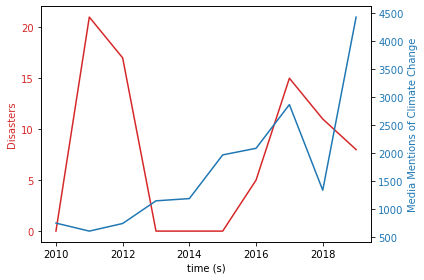

In [76]:
plot_disasters('tropical cyclone')

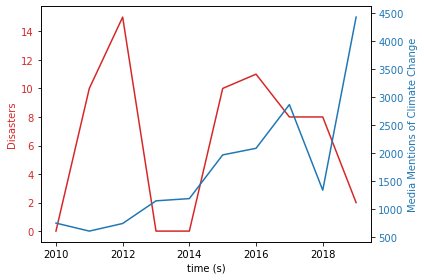

In [77]:
plot_disasters('wildfire')

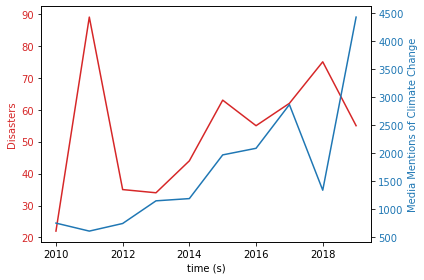

In [78]:
plot_disasters('severe storm')

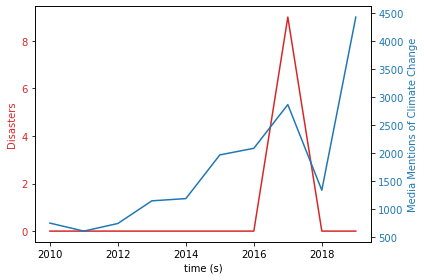

In [79]:
plot_disasters('freeze')

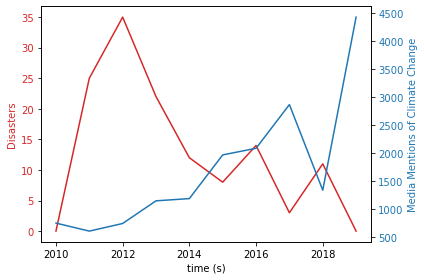

In [81]:
plot_disasters('drought')

## Kaggle Disaster Dataset

In [107]:
dist2=pd.read_csv('../us_disaster_declarations.csv')

dist2['DateTime']=pd.to_datetime(dist2.declaration_date.str.split("T", expand=True)[0], format='%m/%d/%Y', errors='ignore')


#only look at 2010-2019
#only look at ih_program_declared=1, ia_program_declared=1
#only look at designated_area=statewide


start_date="2010-01-01"
end_date="2019-12-31"

dist2=get_data_between_dates(dist2, start_date, end_date)

#dist2=dist2[dist2.ih_program_declared==1]
#dist2=dist2[dist2.ia_program_declared==1]
dist2=dist2[dist2.designated_area=='Statewide']

#groupby months
#group incident type, total
dist2=dist2.groupby([dist2.DateTime.dt.to_period("M"),dist2.incident_type]).count()

print(dist2)

AttributeError: Can only use .dt accessor with datetimelike values

In [91]:
dist2.declaration_date.str.split("T", expand=True)[0]

0        1953-05-02
1        1953-05-15
2        1953-05-29
3        1953-06-02
4        1953-06-06
            ...    
61883    2021-03-31
61884    2021-03-31
61885    2021-03-31
61886    2021-03-31
61887    2021-03-31
Name: 0, Length: 61888, dtype: object

In [109]:
pd.to_datetime(dist2.DateTime)
#dt.to_period("M")

41288   2011-09-03
42077   2012-07-30
42496   2012-10-29
46034   2016-07-10
Name: DateTime, dtype: datetime64[ns]